In [1]:
# import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer

In [2]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Simple example

In [3]:
# Creating a simple dataset
data = {
    'Age': [25, np.nan, 35, 40, 28, 33, np.nan, 30, 31, 29],
    'Salary': [50000, 54000, None, 62000, 58000, 60000, 52000, None, 55000, 53000],
    'Gender': ['Male', 'Female', 'Female', np.nan, 'Male', 'Male', 'Female', np.nan, 'Female', np.nan],
    'Experience': [np.nan, 5, 10, 8, 3, 7, None, 6, 9, 4]
}
df = pd.DataFrame(data)
df

,Age,Salary,Gender,Experience
0,25.0,50000.0,Male,NaN
1,NaN,54000.0,Female,5.0
2,35.0,NaN,Female,10.0
3,40.0,62000.0,NaN,8.0
4,28.0,58000.0,Male,3.0
5,33.0,60000.0,Male,7.0
6,NaN,52000.0,Female,NaN
7,30.0,NaN,NaN,6.0
8,31.0,55000.0,Female,9.0
9,29.0,53000.0,NaN,4.0


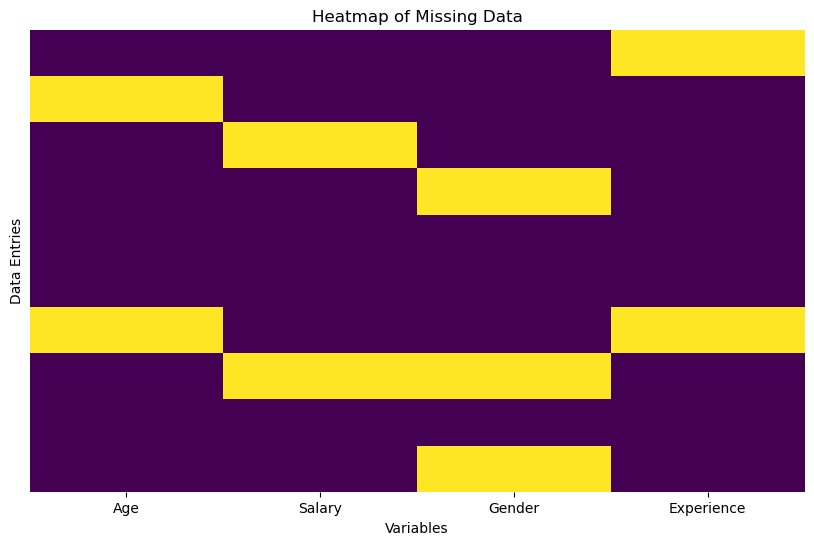

In [4]:
# Create a heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.xlabel('Variables')
plt.ylabel('Data Entries')
plt.show()


### Deletion

In [5]:
# Listwise Deletion
df.dropna()

,Age,Salary,Gender,Experience
4,28.0,58000.0,Male,3.0
5,33.0,60000.0,Male,7.0
8,31.0,55000.0,Female,9.0


In [6]:
# Pairwise Deletion
df.Age.dropna()

0    25.0
2    35.0
3    40.0
4    28.0
5    33.0
7    30.0
8    31.0
9    29.0
Name: Age, dtype: float64

In [7]:
df.dropna(subset=['Age'],how='any')

,Age,Salary,Gender,Experience
0,25.0,50000.0,Male,NaN
2,35.0,NaN,Female,10.0
3,40.0,62000.0,NaN,8.0
4,28.0,58000.0,Male,3.0
5,33.0,60000.0,Male,7.0
7,30.0,NaN,NaN,6.0
8,31.0,55000.0,Female,9.0
9,29.0,53000.0,NaN,4.0


All operations in pandas like mean, median, sum etc intrinsically skip missing values. Except with skipna=False.

In [8]:
df.Age.mean(skipna=False)

nan

In [9]:
df.Age.mean() 

31.375

In [10]:
# the result is the same as with pairwise deletion
df.Age.dropna().mean()

31.375

### Imputation

In [11]:
df

,Age,Salary,Gender,Experience
0,25.0,50000.0,Male,NaN
1,NaN,54000.0,Female,5.0
2,35.0,NaN,Female,10.0
3,40.0,62000.0,NaN,8.0
4,28.0,58000.0,Male,3.0
5,33.0,60000.0,Male,7.0
6,NaN,52000.0,Female,NaN
7,30.0,NaN,NaN,6.0
8,31.0,55000.0,Female,9.0
9,29.0,53000.0,NaN,4.0


#### Imputation with the `SimpleImputer` class, which is part of the `scikit-learn` library
1. Create the SimpleImputer object
    + The SimpleImputer is a tool used to fill in missing values (NaNs or other representations of missing data) in a dataset.
        + The `strategy` parameter (e.g. 'median') specifies the method used to replace missing values.
2. Fit the imputer and transform the data
    + The fit_transform() method is a two-step process:
        + Fit: This step involves calculating e.g. the median of each column in dataset that is specified to have missing values imputed. The imputer "learns" or "fits" these median values.
        + Transform: This step involves applying or "transforming" these learned median values to the missing entries in the respective columns of the dataset. Essentially, wherever there is a missing value in a column, it is replaced by e.g. the median of that column which was calculated in the fit step.
3. Write the imputed variables back to the DataFrame
    + The output is a numpy array with all missing values replaced.   

In [12]:
df2 = df.copy()

# impute "Experience" with a constant
# initialize an instance of the SimpleImputer class
imp_const = SimpleImputer(strategy='constant', fill_value=3)
# Fit the imputer, transform the data and write it back to the DataFrame
df2.loc[:,'Experience'] = imp_const.fit_transform(df[['Experience']])

# impute "Gender" with the mode (most frequent value)
imp_mode = SimpleImputer(strategy = 'most_frequent')
df2.loc[:,'Gender'] = imp_mode.fit_transform(df[['Gender']])

# impute "Salary" with the median
imp_median = SimpleImputer(strategy = 'median')
df2.loc[:,'Salary'] = imp_median.fit_transform(df[['Salary']])

# impute "Age" with the mean
imp_mean = SimpleImputer(strategy = 'mean')
df2.loc[:,'Age'] = imp_mean.fit_transform(df[['Age']])


## Titanic
Columns age, deck, and embarked contain missing values.

In [13]:
# count missings
ti_missing = titanic.isnull().sum()
# only for columns with at least 1 missing value
ti_missing = ti_missing[ti_missing > 0]
# percentages of missings per variable 
ti_missing / titanic.shape[0] * 100

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

### deck
77 % missings -> ignore variable

### embarked
2 missings, categorical -> mode imputation  
(note that embark_town is the same variable as embarked but with spelled out city names)

In [14]:
titanic2 = titanic.copy().drop(columns=['embark_town', 'deck'])

# initialize an instance of the SimpleImputer class with strategy='most_frequent'
imp_mode = SimpleImputer(strategy = 'most_frequent')
# Fit the imputer, transform the data and write it back to the DataFrame
titanic2.loc[:,'embarked'] = imp_mode.fit_transform(titanic2[['embarked']])
titanic2.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

### age
Regression imputation

In [15]:
# Step 1: Prepare the Data
titanic3 = titanic2.copy()

# Remove rows where the target variable for imputation (Age) is missing
train_data = titanic3.dropna(subset=['age'])

# Extract rows where Age is missing to impute them later
missing_age_data = titanic3[titanic3['age'].isnull()]

In [16]:
# Step 2: Fit a linear regression model and focus on a subset of relevant variables that may be predictive of Age
model = smf.ols(formula="age ~ pclass + sibsp + parch + fare", data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     51.82
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           2.65e-38
Time:                        13:18:07   Log-Likelihood:                -2831.7
No. Observations:                 714   AIC:                             5673.
Df Residuals:                     709   BIC:                             5696.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0231      1.844     26.045      0.000      44.403      51.643
pclass        -6.7766      0.703     -9.635      0.000      -8.157      -5.396
sibsp         -3.8277      0.564     -6.782      0.000      -4.936      -2.720
parch         -1.1951      0.622     -1.922      0.055      -2.416       0.026
fare          -0.0199      0.011     -1.745      0.081      -0.042       0.002
==============================================================================
Omnibus:                       20.594   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.806
Skew:                           0.394   Prob(JB):                     1.84e-05
Kurtosis:                       3.333   Cond. No.                         259.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Step 3: Predict Missing Ages
predicted_ages = model.predict(missing_age_data)

# Fill in the missing values in the original data
titanic3.loc[titanic3['age'].isnull(), 'age'] = predicted_ages

In [18]:
titanic3.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64